# Reducción de carga cognitiva: Simplifique la siguiente gráfica:

In [ ]:
#%pip install ydata_profiling

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [3]:
# Abrir el archivo CSV
data = pd.read_csv('Depuracion(ventas unitarias).csv')

In [4]:
ProfileReport(data)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data

,Fecha,Ventas Reales (unidades),Ventas planificadas (unidades)
0,Jan-18,50000000.0,NaN
1,Feb-18,42000000.0,NaN
2,Mar-18,44000000.0,NaN
3,Apr-18,43000000.0,NaN
4,May-18,42500000.0,NaN
5,Jun-18,51000000.0,NaN
6,Jul-18,63000000.0,NaN
7,Aug-18,59000000.0,NaN
8,Sep-18,50000000.0,NaN
9,Oct-18,46000000.0,NaN


<ipython-input-6-b6de8b270606>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x / 1_000_000):,}M' for x in ax.get_yticks()])


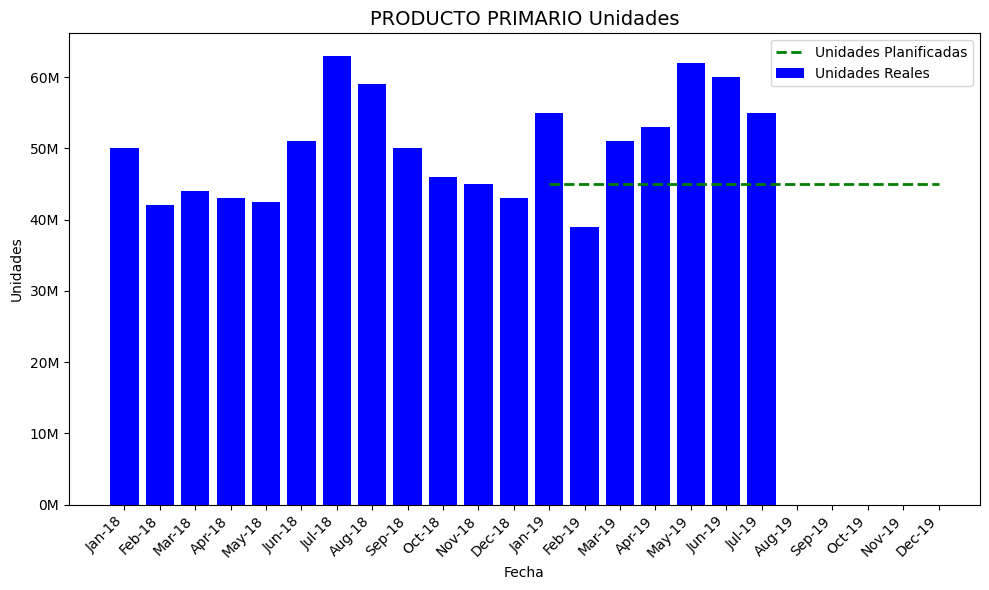

In [6]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras de Ventas Reales
ax.bar(data['Fecha'], data['Ventas Reales (unidades)'], color='blue', label='Unidades Reales')

# Graficar la línea de Ventas Planificadas
ax.plot(data['Fecha'], data['Ventas planificadas (unidades)'], color='green', linestyle='--', linewidth=2, label='Unidades Planificadas')

# Configurar etiquetas del eje Y en millones
ax.set_yticklabels([f'{int(x / 1_000_000):,}M' for x in ax.get_yticks()])

# Configurar título y etiquetas
ax.set_title('PRODUCTO PRIMARIO Unidades', fontsize=14)
ax.set_ylabel('Unidades')
ax.set_xlabel('Fecha')

# Girar etiquetas del eje X para mayor claridad
plt.xticks(rotation=45, ha='right')

# Añadir leyenda
ax.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<ipython-input-22-d005258034b3>:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data = data.set_index('Fecha').resample('Q').sum().reset_index()


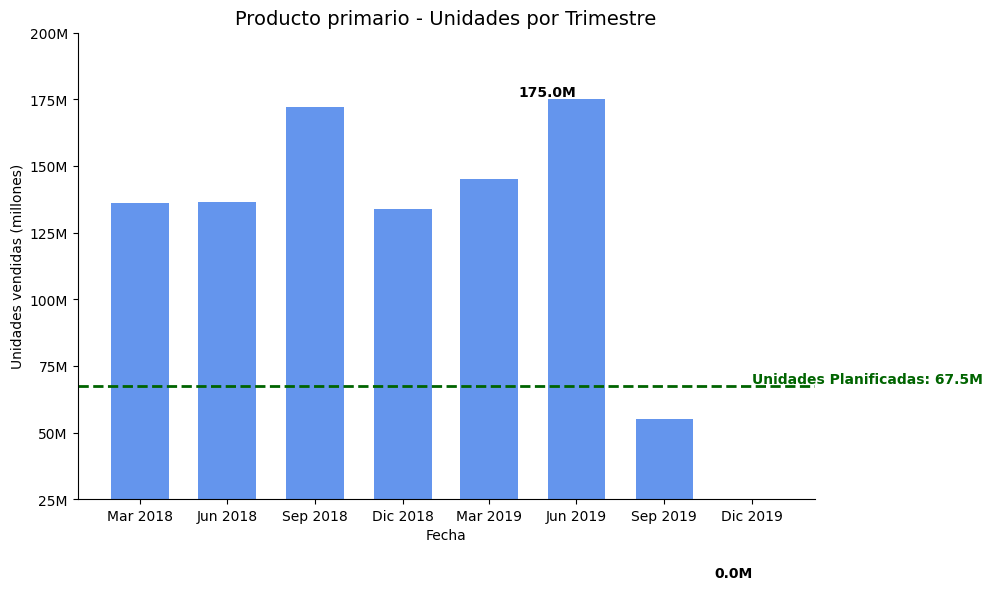

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Función para formatear fechas en español
def format_date_to_spanish(date):
    months = ["Ene", "Feb", "Mar", "Abr", "May", "Jun",
              "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
    return f"{months[date.month - 1]} {date.year}"

# Agrupar los datos por trimestre (puedes cambiar según lo que necesites)
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%b-%y')
data = data.set_index('Fecha').resample('Q').sum().reset_index()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras de Ventas Reales con mayor grosor
ax.bar(data['Fecha'], data['Ventas Reales (unidades)'], color='cornflowerblue', width=60)

# Graficar la línea de Ventas Planificadas (una sola línea recta)
average_plan = data['Ventas planificadas (unidades)'].mean()
ax.axhline(y=average_plan, color='darkgreen', linestyle='--', linewidth=2)

# Añadir etiqueta para "Unidades Planificadas" junto a la línea punteada con el valor
ax.text(data['Fecha'].iloc[-1], average_plan, f'Unidades Planificadas: {average_plan / 1_000_000:.1f}M',
        color='darkgreen', ha='left', va='bottom', fontsize=10, weight='bold')

# Añadir etiquetas en puntos críticos (máximos y mínimos de Ventas Reales)
max_value = data['Ventas Reales (unidades)'].max()
min_value = data['Ventas Reales (unidades)'].min()
max_date = data.loc[data['Ventas Reales (unidades)'].idxmax(), 'Fecha']
min_date = data.loc[data['Ventas Reales (unidades)'].idxmin(), 'Fecha']

# Etiqueta del valor máximo
ax.text(max_date, max_value, f'{max_value / 1_000_000:.1f}M', ha='right', va='bottom',
        fontsize=10, color='black', weight='bold')

# Etiqueta del valor mínimo
ax.text(min_date, min_value, f'{min_value / 1_000_000:.1f}M', ha='right', va='top',
        fontsize=10, color='black', weight='bold')

# Configurar etiquetas del eje Y en millones sin mostrar 0M
yticks = ax.get_yticks()
yticks = yticks[yticks > 0]  # Eliminar el valor 0
ax.set_yticks(yticks)  # Establecer los nuevos ticks
ax.set_yticklabels([f'{int(x / 1_000_000):,}M' for x in yticks])  # Formatear etiquetas

# Asegúrate de que el rango del eje Y comience por encima de 0
ax.set_ylim(bottom=yticks[0])  # Ajusta el límite inferior del eje Y

# Configurar título y etiquetas
ax.set_title('Producto primario - Unidades por Trimestre', fontsize=14)
ax.set_ylabel('Unidades vendidas (millones)')
ax.set_xlabel('Fecha')

# Formato de fechas en el eje X (mes en letras y año en español)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato básico para manejar fechas
ax.set_xticks(data['Fecha'])

# Cambiar las etiquetas del eje X a formato español
ax.set_xticklabels([format_date_to_spanish(date) for date in data['Fecha']], rotation=0, ha='center')

# Eliminar los bordes superior y derecho para simplificar la visualización
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
